<a href="https://colab.research.google.com/github/penfever/introml/blob/master/2_advertising_hw_baf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Linear regression on the Advertising data
=====================================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: bf996
-   **Name**: Benjamin Feuer

To illustrate principles of linear regression, we are going to use some
data from the textbook “An Introduction to Statistical Learning
withApplications in R” (Gareth James, Daniela Witten, Trevor Hastie,
Robert Tibshirani) (available via NYU Library).

The dataset is described as follows:

> Suppose that we are statistical consultants hired by a client to
> provide advice on how to improve sales of a particular product. The
> `Advertising` data set consists of the sales of that product in 200
> different markets, along with advertising budgets for the product in
> each of those markets for three different media: TV, radio, and
> newspaper.
>
> …
>
> It is not possible for our client to directly increase sales of the
> product. On the other hand, they can control the advertising
> expenditure in each of the three media. Therefore, if we determine
> that there is an association between advertising and sales, then we
> can instruct our client to adjust advertising budgets, thereby
> indirectly increasing sales. In other words, our goal is to develop an
> accurate model that can be used to predict sales on the basis of the
> three media budgets.

Sales are reported in thousands of units, and TV, radio, and newspaper
budgets, are reported in thousands of dollars.

For this assignment, you will fit a linear regression model to a small
dataset. You will iteratively improve your linear regression model by
examining the residuals at each stage, in order to identify problems
with the model.

Make sure to include your name and net ID in a text cell at the top of
the notebook.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Read in and pre-process data

In this section, you will read in the “Advertising” data, and make sure
it is loaded correctly. Visually inspect the data using a pairplot, and
note any meaningful observations. In particular, comment on which
features appear to be correlated with product sales, and which features
appear to be correlated with one another. Then, split the data into
training data (70%) and test data (30%).

**The code in this section is provided for you**. However, you should
add a text cell at the end of this section, in which you write your
comments and observations.

#### Read in data

In [ ]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df  = pd.read_csv(url, index_col=0)
df.head()
df.info()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Note that in this dataset, the first column in the data file is the row
label; that’s why we use `index_col=0` in the `read_csv` command. If we
would omit that argument, then we would have an additional (unnamed)
column in the dataset, containing the row number.

(You can try removing the `index_col` argument and re-running the cell
above, to see the effect and to understand why we used this argument.)

#### Visually inspect the data

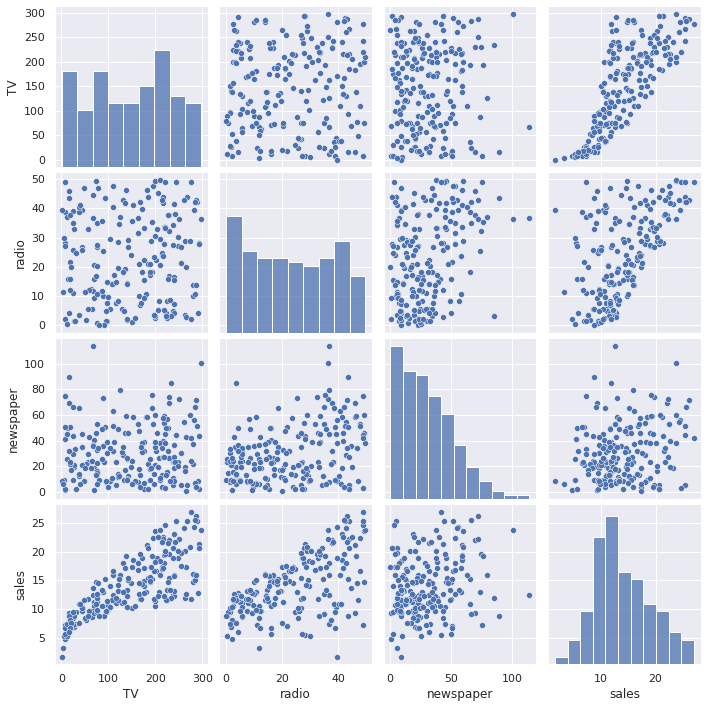

In [ ]:
sns.pairplot(df);

The most important panels here are on the bottom row, where `sales` is
on the vertical axis and the advertising budgets are on the horizontal
axes.

OBSERVATIONS:

The lower right hand corner plot shows sales on the vertical axis and TV ad spending on the horizontal axis. On visual inspection, there appears to be a positive correlation between the two.

Directly to the right of that plot, we see sales on the vertical and radio on the horizontal. There appears to be a weaker positive correlation.

Directly to the right of that plot, we have sales on the vertical and newspaper on the horizontal. It is not clear from a visual inspection whether there is any correlation.

There may also be a slight positive correlation between newspaper ads and radio ads. This makes sense if they are both covarying to some degree with sales.

#### Split up data

We will use 70% of the data for training and the remaining 30% to test
the regression model.

In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 6 to 144
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 84 to 131
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


### 2. Fit simple linear regression models

Use the training data to fit a simple linear regression to predict
product sales, for each of three features: TV ad budget, radio ad
budget, and newspaper ad budget. In other words, you will fit *three*
regression models, with each model being trained on one feature. For
each of the three regression models, create a plot of the training data
and the regression line, with product sales ($y$) on the vertical axis
and the feature on which the model was trained ($x$) on the horizontal
axis.

Also, for each regression model, print the intercept and coefficients,
and compute the MSE and R2 on the training data, and MSE and R2 on the
test data.

Comment on the results. Which type of ads seems to have the greatest
association with increased product sales? Which regression model is most
effective at predicting product sales?

**The code in this section is provided for you**. However, you should
add text cells in which you write your comments, observations, and
answers to the questions.

#### Fit a simple linear regression

In [ ]:
reg_tv    = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news  = LinearRegression().fit(train[['newspaper']], train['sales'])

#### Look at coefficients

In [ ]:
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV       :  0.04613364261502112 7.039439376565906
Radio    :  0.19932367227799483 9.55857651789779
Newspaper:  0.052388532520575494 12.495140202640584


#### Plot data and regression line

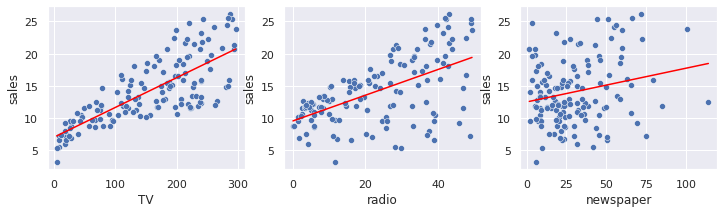

In [ ]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#### Compute R2, MSE for simple regression

In [ ]:
y_pred_tr_tv    = reg_tv.predict(train[['TV']])
y_pred_tr_radio = reg_radio.predict(train[['radio']])
y_pred_tr_news  = reg_news.predict(train[['newspaper']])

In [ ]:
r2_tr_tv    = metrics.r2_score(train['sales'], y_pred_tr_tv)
r2_tr_radio = metrics.r2_score(train['sales'], y_pred_tr_radio)
r2_tr_news  = metrics.r2_score(train['sales'], y_pred_tr_news)
print("TV       : ", r2_tr_tv)
print("Radio    : ", r2_tr_radio)
print("Newspaper: ", r2_tr_news)

TV       :  0.5956633889322034
Radio    :  0.32652446813321623
Newspaper:  0.049022808225397396


In [ ]:
mse_tr_tv    = metrics.mean_squared_error(train['sales'], y_pred_tr_tv)
mse_tr_radio = metrics.mean_squared_error(train['sales'], y_pred_tr_radio)
mse_tr_news  = metrics.mean_squared_error(train['sales'], y_pred_tr_news)
print("TV       : ", mse_tr_tv)
print("Radio    : ", mse_tr_radio)
print("Newspaper: ", mse_tr_news)

TV       :  10.416688729269627
Radio    :  17.35035806851361
Newspaper:  24.499471787109588


In [ ]:
y_pred_ts_tv    = reg_tv.predict(test[['TV']])
y_pred_ts_radio = reg_radio.predict(test[['radio']])
y_pred_ts_news  = reg_news.predict(test[['newspaper']])

In [ ]:
r2_ts_tv    = metrics.r2_score(test['sales'], y_pred_ts_tv)
r2_ts_radio = metrics.r2_score(test['sales'], y_pred_ts_radio)
r2_ts_news  = metrics.r2_score(test['sales'], y_pred_ts_news)
print("TV       : ", r2_ts_tv)
print("Radio    : ", r2_ts_radio)
print("Newspaper: ", r2_ts_news)

TV       :  0.6380140945186934
Radio    :  0.33914232362551944
Newspaper:  0.05698179689380223


In [ ]:
mse_ts_tv    = metrics.mean_squared_error(test['sales'], y_pred_ts_tv)
mse_ts_radio = metrics.mean_squared_error(test['sales'], y_pred_ts_radio)
mse_ts_news  = metrics.mean_squared_error(test['sales'], y_pred_ts_news)
print("TV       : ", mse_ts_tv)
print("Radio    : ", mse_ts_radio)
print("Newspaper: ", mse_ts_news)

TV       :  10.917297828100997
Radio    :  19.931107719163858
Newspaper:  28.44091558466123


Which type of ads seems to have the greatest association with increased product sales? 

TV > Radio > Newspaper > Prediction by Mean

Which regression model is most effective at predicting product sales?

TV > Radio > Newspaper > Prediction by Mean

### 3. Explore the residuals for the single linear regression models

We know that computing MSE or R2 is not sufficient to diagnose a problem
with a linear regression.

Create some additional plots as described below to help you identify any
problems with the regression. Use training data for all of the items
below.

-   For each of the three regression models, plot predicted sales
    ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the
    horizontal axis. Make sure both axes use the same scale. Comment on
    your observations. What would you expect this plot to look like for
    a model that explains the data well?
-   For each of the three regression models, compute the residuals
    ($y - \hat{y}$). Note that some of these will be negative, and some
    will be positive. What is the mean residual for each of the
    regression models? What *should* be the mean residual for a fitted
    linear regression model? Explain your answer.
-   For each of the three regression models, plot the residuals
    ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the
    horizontal axis. Use the same scale for all three subplots. Comment
    on your observations. Is there a pattern in the residuals (and if
    so, what might it indicate), or do they appear to have no pattern
    with respect to actual sales?
-   For each of the three regression models AND each of the three
    features, plot the residuals ($y - \hat{y}$) on the vertical axis,
    and the feature ($x$) on the horizontal axis. This plot will include
    nine subplots in total. Make sure to clearly label each axis, and
    also label each subplot with a title that indicates which regression
    model it uses. Is there a pattern in the residuals (and if so, what
    might it indicate), or do they appear to have no pattern with
    respect to each of the three features?

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

Text(0.5, 1.0, 'Predicted v Actual Sales: TV')

(5.0, 25.0)

(5.0, 25.0)

Text(0.5, 1.0, 'Predicted v Actual Sales: Radio')

(5.0, 20.0)

(5.0, 20.0)

Text(0.5, 1.0, 'Predicted v Actual Sales: Newspaper')

(5.0, 20.0)

(5.0, 20.0)

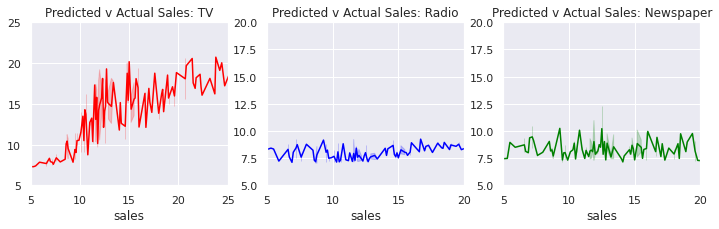

In [57]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
lp1 = sns.lineplot(data=train, x="sales", y=reg_tv.predict(train[['TV']]), color='red');
lp1.set_title('Predicted v Actual Sales: TV')
lp1.set_xlim(5,25)
lp1.set_ylim(5,25)

plt.subplot(1,3,2)
lp2 = sns.lineplot(data=train, x="sales", y=reg_tv.predict(train[['radio']]), color='blue');
lp2.set_title('Predicted v Actual Sales: Radio')
lp2.set_xlim(5,20)
lp2.set_ylim(5,20)

plt.subplot(1,3,3)
lp3 = sns.lineplot(data=train, x="sales", y=reg_tv.predict(train[['newspaper']]), color='green');
lp3.set_title('Predicted v Actual Sales: Newspaper')
lp3.set_xlim(5,20)
lp3.set_ylim(5,20)

Observations on the above plots:

An ideal, perfectly predictive metric with R2 = 1 would look like the line x=y.

As one would expect from visual inspection of the data as well as R2 scores, predictions based on TV ads placed show the best correlation with actual regional sales. The data are jagged, but roughly follow the correct trend.

The other two lines appear to have little predictive power -- they are approximately flat aside from noise, which suggests that their predictions do not fluctuate much with actual fluctuations in sales.

In [ ]:
# For each of the three regression models, compute the residuals ($y - \hat{y}$). Note that some of these will be negative, and some will be positive.
# If I were doing this in C, I would want the actual sales for each market, minus the sales predicted by the model for each market.

residualsTV = train.sub(y_pred_tr_tv, axis='rows')
residualsRadio = train.sub(y_pred_tr_radio, axis='rows')
residualsNews = train.sub(y_pred_tr_news, axis='rows')


In [ ]:
# Compute mean residual (absolute value).
print(residualsTV['sales'].abs().mean())
print(residualsRadio['sales'].abs().mean())
print(residualsNews['sales'].abs().mean())


2.570902390544696
3.2167946093364326
4.066020381948918


Text(0.5, 1.0, 'Residuals v Actual Sales: TV')

Text(0.5, 1.0, 'Residuals v Actual Sales: Radio')

Text(0.5, 1.0, 'Residuals v Actual Sales: Newspaper')

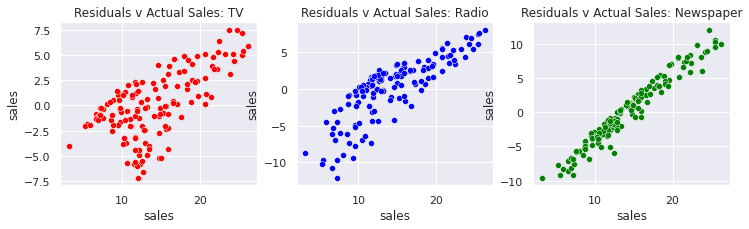

In [60]:
# TODO: improve naming of plots for this cell and next cell

fig = plt.figure(figsize=(12,3))

# For each of the three regression models, plot the residuals ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Use the same scale for all three subplots.

plt.subplot(1,3,1)
rp1 = sns.scatterplot(data=train, x="sales", y=residualsTV['sales'], color='red');
rp1.set_title('Residuals v Actual Sales: TV')
#sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
rp2 = sns.scatterplot(data=train, x="sales", y=residualsRadio['sales'], color='blue');
rp2.set_title('Residuals v Actual Sales: Radio')
#sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
rp3 = sns.scatterplot(data=train, x="sales", y=residualsNews['sales'], color='green');
rp3.set_title('Residuals v Actual Sales: Newspaper')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

The residual error in each case appears to be highly linear, more so with the less predictive metrics, following the x=y line.

Does this mean that residual error is lowest when the sale amount happens to fall near the mean? In which case, the model is essentially replicating prediction by mean?

Text(0.5, 1.0, 'TV Residuals v TV Ads')

Text(0.5, 1.0, 'TV Residuals v Radio Ads')

Text(0.5, 1.0, 'TV Residuals v Newspaper Ads')

Text(0.5, 1.0, 'Radio Residuals v TV Ads')

Text(0.5, 1.0, 'Radio Residuals v Radio Ads')

Text(0.5, 1.0, 'Radio Residuals v Newspaper Ads')

Text(0.5, 1.0, 'Newspaper Residuals v TV Ads')

Text(0.5, 1.0, 'Newspaper Residuals v Radio Ads')

Text(0.5, 1.0, 'Newspaper Residuals v Newspaper Ads')

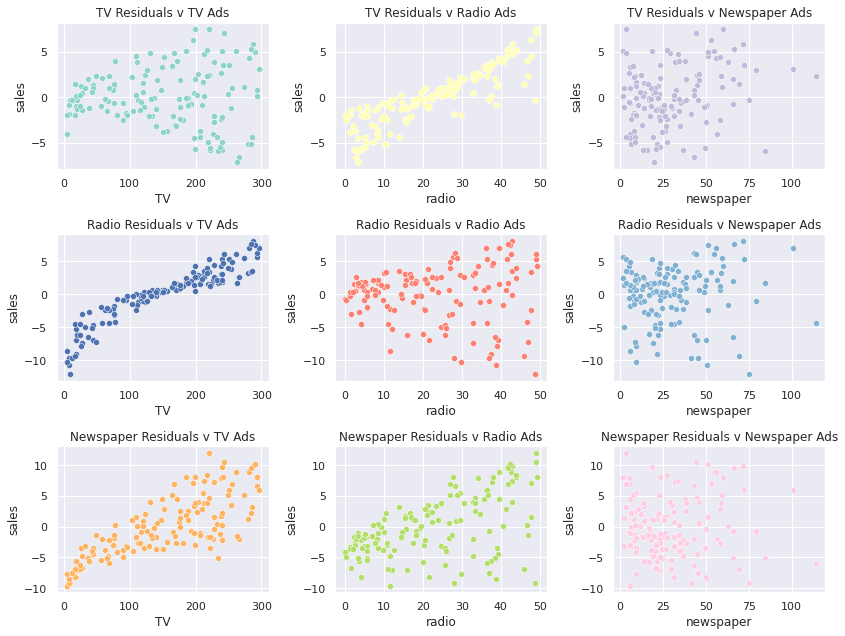

In [61]:
# For each of the three regression models AND each of the three features, plot the residuals ($y - \hat{y}$) on the vertical axis, 
# and the feature ($x$) on the horizontal axis. This plot will include nine subplots in total. 
# Make sure to clearly label each axis, and also label each subplot with a title that indicates which regression model it uses.
sns.set()
qualitative_colors = iter(sns.color_palette("Set3", 10))
fig = plt.figure(figsize=(12,9))

plt.subplot(3,3,1)
rd1 = sns.scatterplot(data=train, x="TV", y=residualsTV['sales'], color=next(qualitative_colors));
rd1.set_title('TV Residuals v TV Ads')
#sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(3,3,2)
rd2 = sns.scatterplot(data=train, x="radio", y=residualsTV['sales'], color=next(qualitative_colors));
rd2.set_title('TV Residuals v Radio Ads')
#sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(3,3,3)
rd3 = sns.scatterplot(data=train, x="newspaper", y=residualsTV['sales'], color=next(qualitative_colors));
rd3.set_title('TV Residuals v Newspaper Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,4)
rd4 = sns.scatterplot(data=train, x="TV", y=residualsRadio['sales']);
rd4.set_title('Radio Residuals v TV Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,5)
rd5 = sns.scatterplot(data=train, x="radio", y=residualsRadio['sales'], color=next(qualitative_colors));
rd5.set_title('Radio Residuals v Radio Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,6)
rd6 = sns.scatterplot(data=train, x="newspaper", y=residualsRadio['sales'], color=next(qualitative_colors));
rd6.set_title('Radio Residuals v Newspaper Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,7)
rd7 = sns.scatterplot(data=train, x="TV", y=residualsNews['sales'], color=next(qualitative_colors));
rd7.set_title('Newspaper Residuals v TV Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,8)
rd8 = sns.scatterplot(data=train, x="radio", y=residualsNews['sales'], color=next(qualitative_colors));
rd8.set_title('Newspaper Residuals v Radio Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.subplot(3,3,9)
rd9 = sns.scatterplot(data=train, x="newspaper", y=residualsNews['sales'], color=next(qualitative_colors));
rd9.set_title('Newspaper Residuals v Newspaper Ads')
#sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

fig.tight_layout()

The linearity we see here may related to the relationship between the linear functions we have generated.

### 4. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using
all three features to train a single model: TV ad budget, radio ad
budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the
training data, and MSE and R2 on the test data. Comment on the results.
Make sure to explain any differences between the coefficients of the
multiple regression model, and the coefficients of the three simple
linear regression models. If they are different, why?

**The code in the first part of this section is provided for you**.
However, you should add text cells in which you write your comments,
observations, and answers to the questions.

Also repeat the analysis of part (3) for this regression model. Use
training data for all of these items:

-   Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   Compute the residuals ($y - \hat{y}$). What is the mean of the
    residuals? What *should* be the mean of the residuals for a fitted
    linear regression model? Explain your answer.
-   Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Comment on your observations. Is
    there a pattern in the residuals (and if so, what might it
    indicate), or do they appear to have no pattern with respect to
    actual sales?
-   For each of the three features, plot the residuals ($y - \hat{y}$)
    on the vertical axis, and the feature ($x$) on the horizontal axis.
    Make sure to clearly label each axis. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to each of the three features?

**The code in the last part of this section is not provided for you**.
You will need to write code, in addition to the text cells in which you
write your comments, observations, and answers to the questions.

#### Fit a multiple linear regression

In [62]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#### Look at coefficients

In [63]:
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [ 0.04573607  0.1981663  -0.0060163 ]
Intercept:  2.80001039152023


Make sure to explain any differences between the coefficients of the multiple regression model, and the coefficients of the three simple linear regression models. If they are different, why?

#### Compute R2, MSE for multiple regression

In [64]:
y_pred_tr_multi = reg_multi.predict(train[['TV', 'radio', 'newspaper']])

r2_tr_multi  = metrics.r2_score(train['sales'], y_pred_tr_multi)
mse_tr_multi = metrics.mean_squared_error(train['sales'], y_pred_tr_multi)

print("Multiple regression R2:  ", r2_tr_multi)
print("Multiple regression MSE: ", mse_tr_multi)


Multiple regression R2:   0.90952877256659
Multiple regression MSE:  2.3307575651881134


In [65]:
y_pred_ts_multi = reg_multi.predict(test[['TV', 'radio', 'newspaper']])

r2_ts_multi  = metrics.r2_score(test['sales'], y_pred_ts_multi)
mse_ts_multi = metrics.mean_squared_error(test['sales'], y_pred_ts_multi)

print("Multiple regression R2:  ", r2_ts_multi)
print("Multiple regression MSE: ", mse_ts_multi)


Multiple regression R2:   0.8697178732357569
Multiple regression MSE:  3.929238011829442


**Multiple Linear Regression Plots**

Text(0.5, 1.0, 'Predicted v Actual Sales: Multiple Linear Regression (TV, Radio, Newspaper)')

(3.0, 28.0)

(3.0, 28.0)

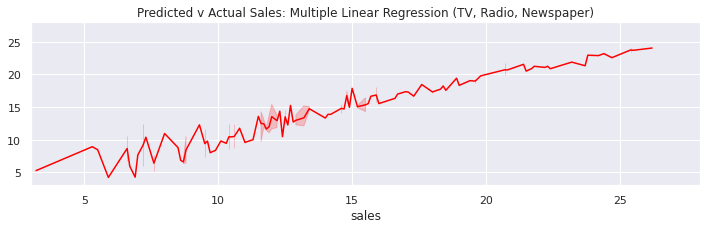

In [68]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,1,1)
lp1 = sns.lineplot(data=train, x="sales", y=y_pred_tr_multi, color='red');
lp1.set_title('Predicted v Actual Sales: Multiple Linear Regression (TV, Radio, Newspaper)')
lp1.set_xlim(3,28)
lp1.set_ylim(3,28)

The R2 score is much higher for the MLR version, and the above chart also shows a much better corellation.

### 5. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three
types of advertising media. However, it does not include *interaction*
effects, in which combining different types of advertising media
together results in a bigger boost in sales than just the additive
effect of the individual media. The pattern in the residuals plots from
parts (1) through (4) suggest that a model including an interaction
effect may explain sales data better than a model including additive
effects. Add four columns to your data frame:

-   `newspaper` $\times$ `radio`
-   `TV` $\times$ `radio`
-   `newspaper` $\times$ `TV`
-   `newspaper` $\times$ `radio` $\times$ `TV`

Then, train a linear regression model on all seven features: the three
types of ad budgets, and the four interaction effects. Repeat the
analysis of part (4) for the model including interaction effects.
Comment on the results. Are the interaction effects helpful for
explaining the effect of ads on product sales? Are there any patterns
evident in the residual plots that suggest further opportunities for
improving the model?

(If you think the results suggest further opportunities for improving
the model, you are welcome to try and to comment on the results!)

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.